<a href="https://colab.research.google.com/github/shyammarjit/Linear-Model-to-estimate-sine-function/blob/main/Linear_Model_to_estimate_sine_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Linear Model to estimate sine function
- This work is done by SHYAM MARJIT a CSE student of IIITGuwahati.
- sujaykumarmarjit@gmail.com
- 8927860176
- This work states that Building a Linear Model to estimate sine function.This is basically a estimation problem where  we have to make a linear model to estimate sine valued function.
- This is written in Python Programming language.
- © 2020 SHYAM MARJIT.  All rights reserved.

# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


### 1.Generate data

In [ ]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    ### BEGIN SOLUTION
    y = np.sin(x)
    ### END SOLUTION
    return y

In [ ]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [ ]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0, 2pi)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    ### BEGIN SOLUTION
    x = np.random.random(N)*2*np.pi
    yd = fx(x)
    ### END SOLUTION
    return x, yd

In [ ]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### 2.Plotting

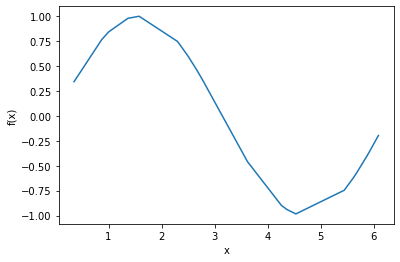

In [ ]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
plotdata()

## 3.Training
We will now define a linear model to estimate the above function, and train it with all the data

### 4.Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [ ]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    ### BEGIN SOLUTION
    N = x.shape[0]
    A = np.ones((N,D+1))
    for d in range(1,D+1): # skipping d
        A[:,d] = np.power(x,d)
    ### END SOLUTION
    return A

In [ ]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

Test passed 👍


### 5.Estimate Weights
Estimate w from yd and A. Use the least square solution you learnt in the video

In [ ]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    ### BEGIN SOLUTION
    N = yd.shape[0]
    D = A.shape[1]-1
    if N>D+1:
      w = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(yd)  # Least sq sol
    elif N<=D+1:
      w = A.T.dot(np.linalg.inv(A.dot(A.T))).dot(yd)  # Min-norm; add 0.00000001*np.eye(A.shape[0])

    ### END SOLUTION
    return w

In [ ]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

Test passed 👍


### 6.Estimate y from the model, given x

In [ ]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    ### BEGIN SOLUTION
    D = w.shape[0]-1
    A = createA(x, D)
    y = A.dot(w)
    ### END SOLUTION
    return y

In [ ]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

Test passed 👍


### 7.Estimate Error
Find E as the mean squared error

In [ ]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    ### BEGIN SOLUTION
    mse = (y-yd).dot(y-yd)/y.shape[0]
    ### END SOLUTION
    return mse

In [ ]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

Test passed 👍


### 8.Plotting


In [ ]:
def plotModel(x, y, yd, title='',xlim=[0,7]):
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])
    plt.xlim(xlim)
    plt.title(title)

## 9.Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [ ]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    ### BEGIN SOLUTION
    x, yd = generateX_fx(Ntest)
    D = w.shape[0]-1
    A = createA(x, D)
    print(A.shape)
    y = predict_y(w, x)
    mse = compute_mse(y, yd)
    ### END SOLUTION
    return x, y, yd, mse

[ 5.77347840e-04  9.94656541e-01  4.47629133e-03 -1.71100138e-01
  4.55823584e-03  5.21943413e-03  1.34069476e-03 -5.61037924e-04
  5.87653884e-05 -1.95333335e-06 -7.62436932e-09]
MSE on train data =  2.105364643221608e-06
(50, 11)
MSE on test data =  2.3126677472930077e-06
Test passed 👍


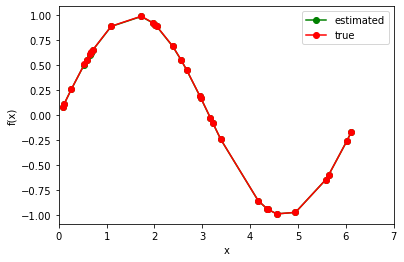

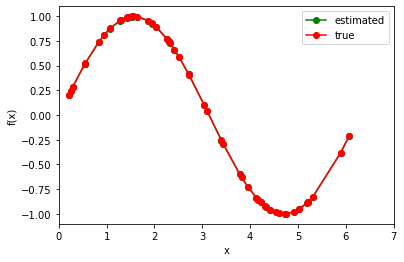

In [ ]:
'''Testing'''
def test_testModel():
    N = 30
    D = 10
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==N
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    Ntest = 50
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_testModel()

## 10.ADVANCED

## 10(A).Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

N=3; D=5
MSE on train data =  1.9445439802625407e-26
(50, 6)
MSE on test data =  12.39746964815664
N=5; D=5
MSE on train data =  1.1102186434336233e-20
(50, 6)
MSE on test data =  0.014826354221113692
N=10; D=5
MSE on train data =  8.366879864180525e-07
(50, 6)
MSE on test data =  8.099864667875583e-05
N=30; D=5
MSE on train data =  5.95060232932282e-06
(50, 6)
MSE on test data =  5.2808805317524675e-05


Text(0, 0.5, 'MSE')

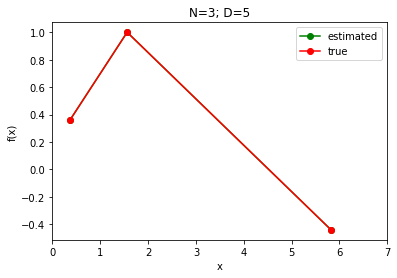

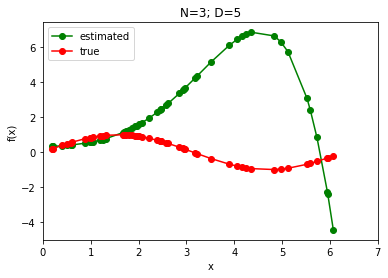

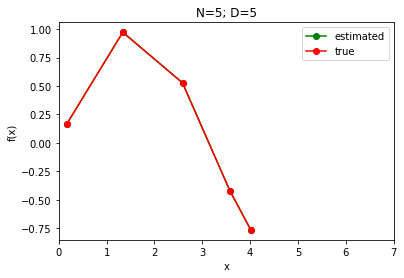

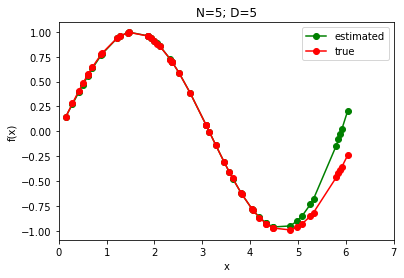

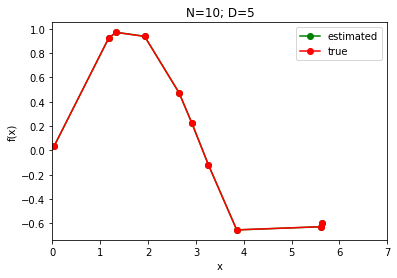

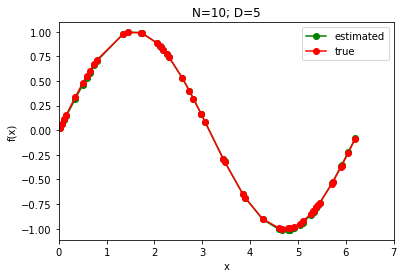

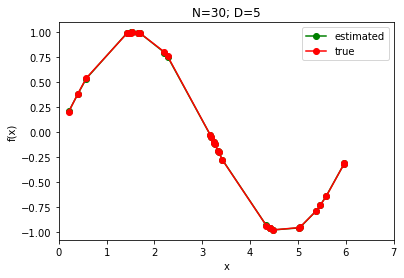

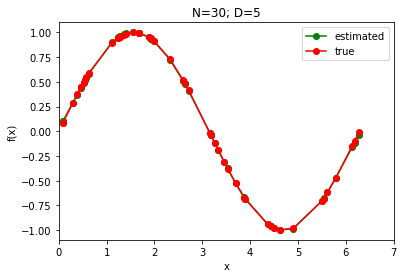

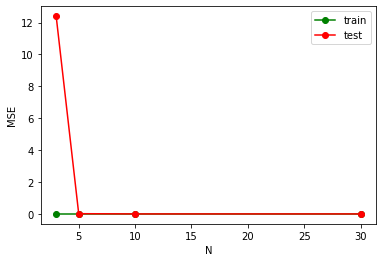

In [ ]:
D = 5
MSE_train = []
MSE_test = []
N_all = [3,5,10,30]
for N in N_all:
  title = "N=%d; D=%d"%(N,D)
  print(title)
  x, y, yd, w, mse = trainModel(N,D)
  MSE_train.append(mse)
  print('MSE on train data = ', mse)
  plotModel(x,y,yd,title)
  Ntest = 50
  x, y, yd, mse = testModel(Ntest,w)
  MSE_test.append(mse)
  print('MSE on test data = ', mse)
  plotModel(x,y,yd,title)
plt.figure()
plt.plot(N_all, MSE_train,'go-')
plt.plot(N_all, MSE_test, 'ro-')
plt.legend(['train','test'])
plt.xlabel('N')
plt.ylabel('MSE')

## 10(B).Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

N=5; D=0
MSE on train data =  0.595653136526684
(50, 1)
MSE on test data =  0.450772448260176
N=5; D=1
MSE on train data =  0.31989262499204124
(50, 2)
MSE on test data =  0.2265864205145986
N=5; D=2
MSE on train data =  0.05752446360414788
(50, 3)
MSE on test data =  0.619266910958714
N=5; D=4
MSE on train data =  2.009442152441751e-09
(50, 5)
MSE on test data =  7.464044707764688
N=5; D=7
MSE on train data =  2.1694534110795377e-16
(50, 8)
MSE on test data =  0.6197314863101847
N=5; D=12
MSE on train data =  3.5213713869610547e-14
(50, 13)
MSE on test data =  229836307.39275178


Text(0, 0.5, 'MSE')

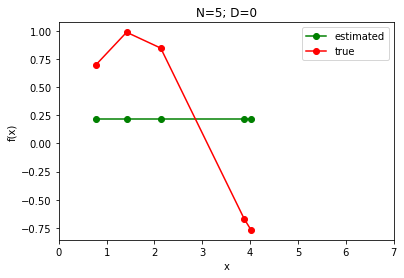

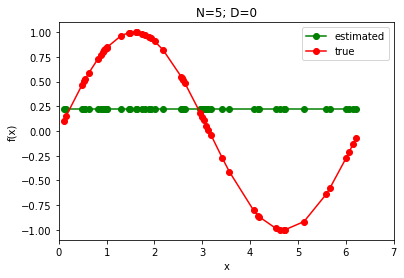

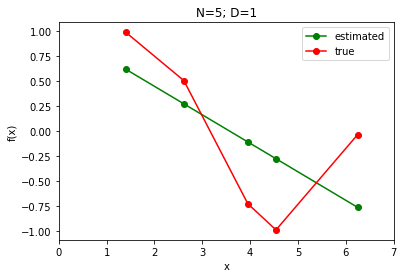

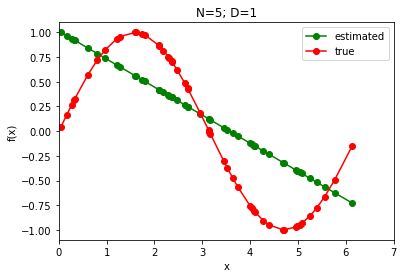

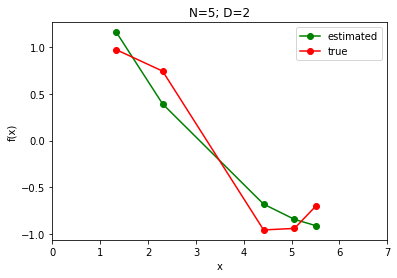

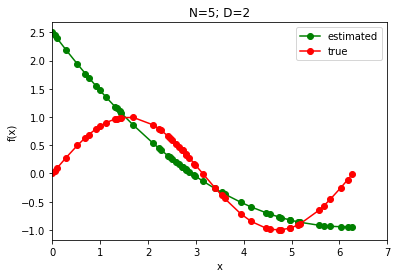

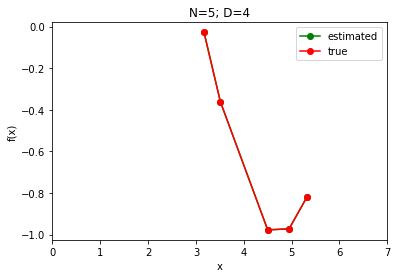

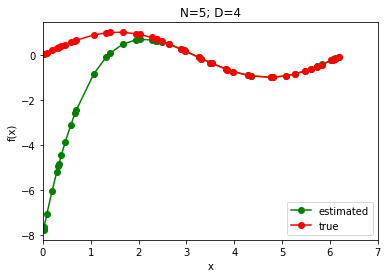

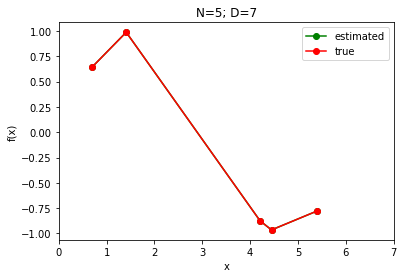

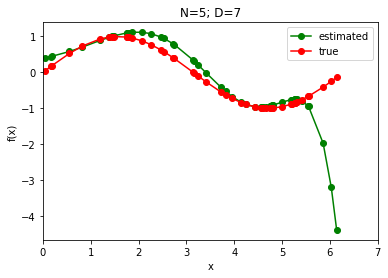

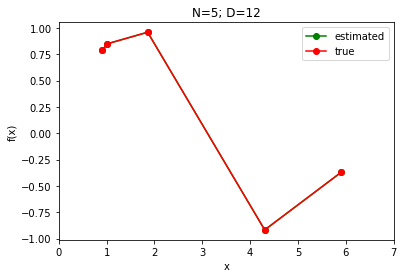

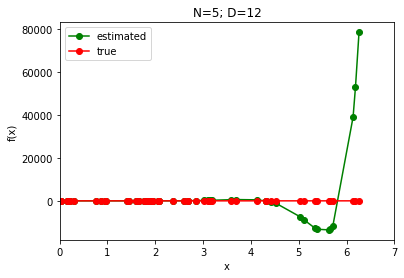

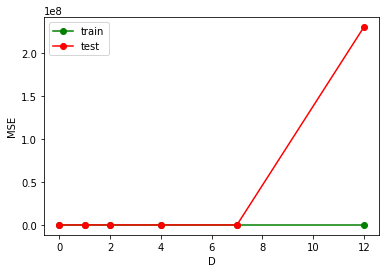

In [ ]:
N=5
MSE_train = []
MSE_test = []
D_all = [0,1,2,4,7,12]
for D in D_all:
  title = "N=%d; D=%d"%(N,D)
  print(title)
  x, y, yd, w, mse = trainModel(N,D)
  MSE_train.append(mse)
  print('MSE on train data = ', mse)
  plotModel(x,y,yd,title)
  Ntest = 50
  x, y, yd, mse = testModel(Ntest,w)
  MSE_test.append(mse)
  print('MSE on test data = ', mse)
  plotModel(x,y,yd,title)
plt.figure()
plt.plot(D_all, MSE_train,'go-')
plt.plot(D_all, MSE_test, 'ro-')
plt.legend(['train','test'])
plt.xlabel('D')
plt.ylabel('MSE')